# Polynomial Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('D:/Extra Classes/Machine Learning/DataSets/FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
used_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
used_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [8]:
x_data = used_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_data = used_data[['CO2EMISSIONS']]

In [10]:
# preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [24]:
# polynomial regression degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(x_train[['ENGINESIZE']])
train_y = np.asanyarray(y_train[['CO2EMISSIONS']])

test_x = np.asanyarray(x_test[['ENGINESIZE']])
test_y = np.asanyarray(y_test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
PLM = poly.fit(train_x)
train_x_poly = PLM.transform(train_x)
train_x_poly

array([[ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.8 ,  3.24],
       ...,
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.7 , 13.69]])

In [26]:
LR = LinearRegression()
train_y_ = LR.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', LR.coef_)
print ('Intercept: ', LR.intercept_)

Coefficients:  [[ 0.         49.23159361 -1.30674654]]
Intercept:  [110.42668526]


Text(0, 0.5, 'Emission')

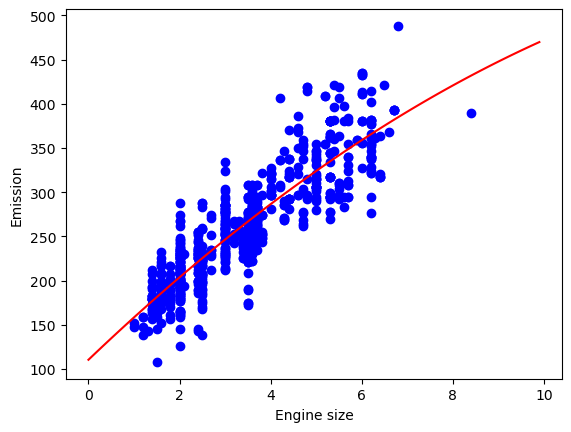

In [28]:
# plot predicted line and real data
plt.scatter(x_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = LR.intercept_[0]+ LR.coef_[0][1]*XX+ LR.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
# Evaluation of model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = LR.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 25.60
Residual sum of squares (MSE): 1122.74
R2-score: 0.72
